In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

# 1. Data Ingestion

In [2]:
df=pd.read_csv("OnlineNewsPopularity.csv")
df.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

# Descriptive statistics

In [4]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
df.isna().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

# Inferences

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Removing whitespace between column name

In [7]:
df.columns=df.columns.str.replace(' ','')

# Adding label column to the dataset

In [8]:
media=df["shares"].median()
media

1400.0

In [9]:
df["label"]=df["shares"]

In [10]:
df["label"].loc[df["label"]<=1400]=0


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df["label"].loc[df['label']>1400]=1

In [12]:
df['label'].value_counts()

0    20082
1    19562
Name: label, dtype: int64

# Exploratory Data Analysis

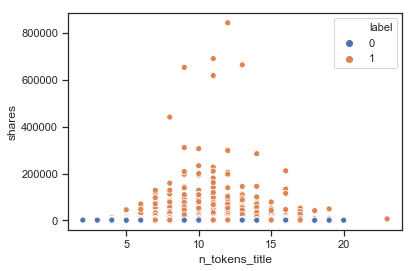

In [17]:
# n_tokens_title
sns.scatterplot(df['n_tokens_title'],df['shares'],hue=df['label'])

n_tokens_title is the number of words in the title.
Most popular articles are having the number of words between 7-16

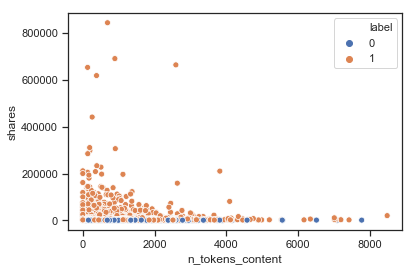

In [18]:
sns.scatterplot(df["n_tokens_content"],df["shares"],hue=df["label"])

n_tokens_content is the number total number of words in the content
from the above scatter plot we can infer that articles having content between 0-2000 tend to be popular.

In [19]:
df[df['n_unique_tokens'] > 1] # removing the outlier from n_unique_tokens feature.

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,label,data_channel
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900,1,Entertainment


In [20]:
df = df[df['n_unique_tokens']<1]

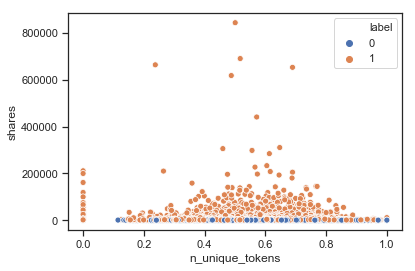

In [21]:
sns.scatterplot(df['n_unique_tokens'],df['shares'],hue=df['label'])

n_unique_tokens is the rate of unique words used in the article.
when The rate of unique words used is in the range 0.4-0.6 the article tends to be famous.

num_hrefs is the number of links the article consists.
> the articles consisting number of links between 0-25 were popular compared to articles which had more number of links.

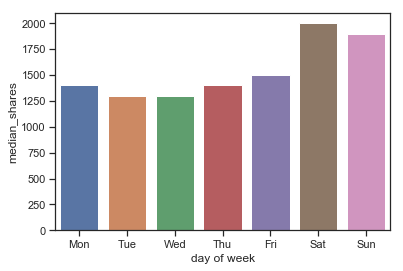

In [66]:
share = []
for d in ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 
          'weekday_is_saturday','weekday_is_sunday']:
    share.append(df[df[d]==1]['shares'].median())
ax = sns.barplot(x= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], y= share)
ax.set(xlabel='day of week', ylabel='median_shares')
plt.show()

We can notice that most of the Articles were shared on Saturday.
So the best day to publish an article can be Saturday.

In [16]:
arr = []
for i,a in enumerate(df.index):
    if(df.loc[a,'data_channel_is_lifestyle'] == 1):
        arr.append('Lifestyle')
    elif(df.loc[a,'data_channel_is_entertainment'] == 1):
        arr.append('Entertainment')
    elif(df.loc[a,'data_channel_is_bus'] == 1):
        arr.append('Bus')
    elif(df.loc[a,'data_channel_is_socmed'] == 1):
        arr.append('Socmed')
    elif(df.loc[a,'data_channel_is_tech'] == 1):
        arr.append('Tech')
    elif(df.loc[a,'data_channel_is_world'] == 1):
        arr.append('World')
    else:
        arr.append('Other')

df['data_channel'] = arr

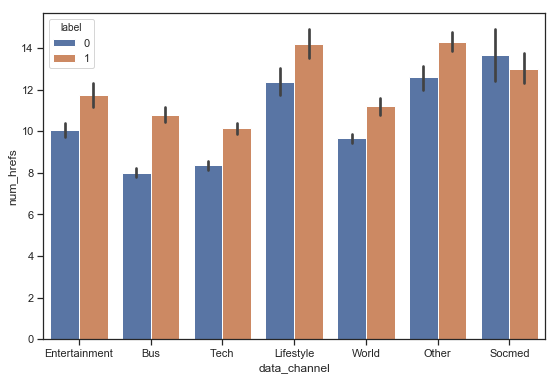

In [22]:
plt.figure(figsize=(9,6))
sns.barplot(df['data_channel'],df['num_hrefs'],hue=df['label'])

Most popular data channel was Lifestyle followed by social media.

In [26]:
df.groupby(['data_channel','label']).shares.sum()

data_channel   label
Bus            0         3090370
               1        16078000
Entertainment  0         4017128
               1        16939699
Lifestyle      0          885879
               1         6842898
Other          0         2305094
               1        34162699
Socmed         0          709757
               1         7721300
Tech           0         3032793
               1        19536200
World          0         5004235
               1        14274500
Name: shares, dtype: int64

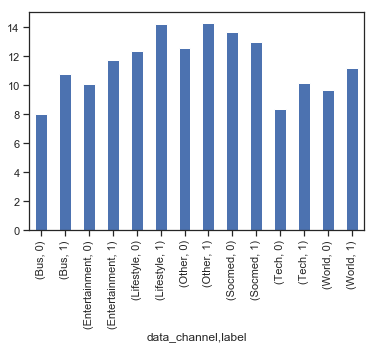

In [38]:
df.groupby(['data_channel','label'])['num_hrefs'].mean().plot(kind='bar')

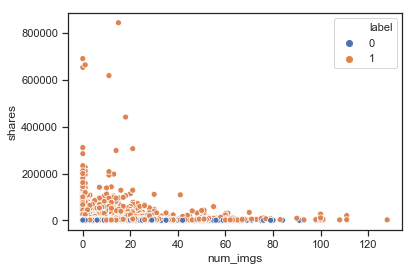

In [60]:
sns.scatterplot(df['num_imgs'],df['shares'],hue=df['label'])

Articles with 10-15 images were more popular and got high number of shares.

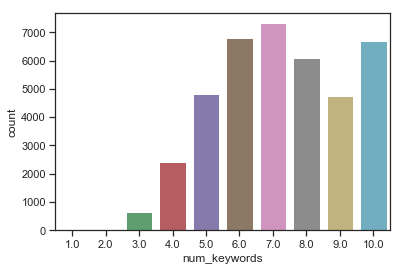

In [170]:
sns.countplot(df['num_keywords'])

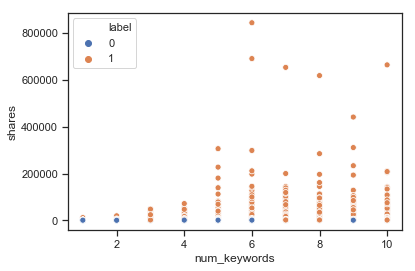

In [172]:
sns.scatterplot(df['num_keywords'],df['shares'],hue=df['label'])

There are more popular articles in the range for num_keywords greater than 5-10

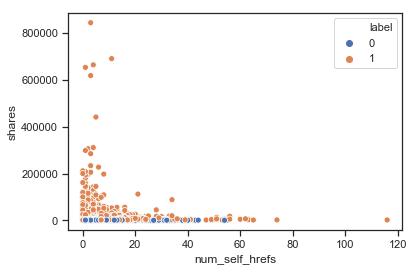

In [49]:
sns.scatterplot(df['num_self_hrefs'],df['shares'],hue=df['label'])

Most of the popular articles have self links between 0-20

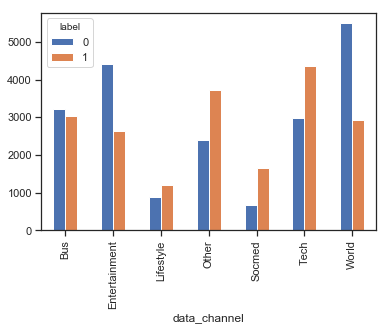

In [24]:
pd.crosstab(df.data_channel, df.label).plot(kind='bar')

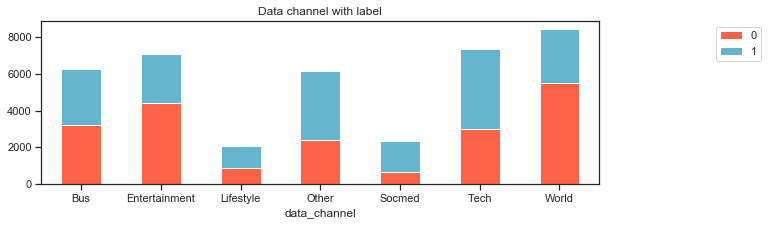

In [62]:
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Data channel with label')
pd.crosstab(df.data_channel, df.label).plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [27]:
pd.crosstab(df.data_channel, df.label)

label,0,1
data_channel,,
Bus,3229,3029
Entertainment,4413,2643
Lifestyle,899,1200
Other,2399,3735
Socmed,664,1659
Tech,2987,4359
World,5491,2936


In [30]:
Per_popular_article_within_group=[]
per_popular_article_entire_group=[]
Per_channel=[]
Data_Channel=[]

In [32]:
Per_popular_article_within_group=['48.4','37.45','57.17','71.5','59.34','33.1']
Per_popular_article_entire_group=['15.48','13.51','6.13','8.48','22.28','15.01']
Per_channel=['16.61','18.72','5.57','6.16','19.49','23.55']
Data_Channel=['Business','Entertainment','Lifestyle','Social Media','Tech','World']

In [55]:
fin = pd.DataFrame({'Data_Channel':Data_Channel,'Per_channel':Per_channel,'Per_popular_article_within_group':Per_popular_article_within_group,'Per_popular_article_entire_group':Per_popular_article_entire_group})
fin

,Data_Channel,Per_channel,Per_popular_article_within_group,Per_popular_article_entire_group
0,Business,16.61,48.4,15.48
1,Entertainment,18.72,37.45,13.51
2,Lifestyle,5.57,57.17,6.13
3,Social Media,6.16,71.5,8.48
4,Tech,19.49,59.34,22.28
5,World,23.55,33.1,15.01


In [58]:
fin.set_index("Data_Channel",inplace=True)
fin

,Per_channel,Per_popular_article_within_group,Per_popular_article_entire_group
Data_Channel,,,
Business,16.61,48.4,15.48
Entertainment,18.72,37.45,13.51
Lifestyle,5.57,57.17,6.13
Social Media,6.16,71.5,8.48
Tech,19.49,59.34,22.28
World,23.55,33.1,15.01


So from the above graph we can infer that

>Highest number of articles were from World then Tech followed by Entertainment and Business.Least number of articles published were from Lifestyle followed by Social Media.

>The highest popular data channel was Social Media followed by Tech and Lifestyle and the least popular data channel is World followed by entertainment.

>Even though World has highest number of articles still the percentage of popular articles is very less.

>Thus Social Media is the most popular data_channel

 # 3. Build a base model:	Build a base model (which will include all the parameter as input) model using Logistic regression considering all the input parameters, calculate all the relevant metrics

In [72]:
x=df.drop(["url","timedelta","label","shares","data_channel"],axis=1)
y=df["label"]

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
from sklearn.model_selection import train_test_split
xtrainlr,xtestlr,ytrainlr,ytestlr=train_test_split(x,y,test_size=0.3,random_state=1)

In [75]:
LR = LogisticRegression()
LR.fit(xtrainlr,ytrainlr)
y_pred_LR = LR.predict(xtestlr)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
print(classification_report(ytestlr,y_pred_LR))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      5940
           1       0.62      0.53      0.57      5953

    accuracy                           0.60     11893
   macro avg       0.61      0.60      0.60     11893
weighted avg       0.61      0.60      0.60     11893



In [77]:
from sklearn.metrics import f1_score
print(f1_score(ytestlr,y_pred_LR))


0.5732380349226455


In [78]:
roc_auc_score(ytestlr,y_pred_LR)

0.6034580646037054

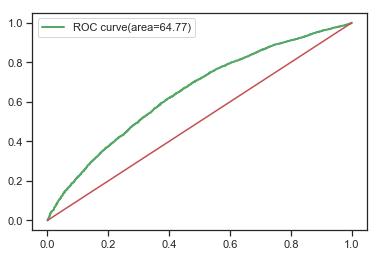

In [255]:
fpr_l,tpr_l,therl=roc_curve(ytestlr,LR.predict_proba(xtestlr)[:,1])
plt.plot(fpr_l,tpr_l,color='g',lw=2,label='ROC curve(area=%0.2f)'% round(auc(fpr_l,tpr_l)*100,2))
plt.plot(fpr_l,fpr_l,color='r')
plt.legend()

In [79]:
Model = []
ROC_AUC_Accuracy = []

In [182]:
Precision=[]
Recall=[]
F1_score=[]

In [80]:
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(ytestlr,y_pred_LR)]

In [186]:
from sklearn.metrics import accuracy_score, mean_squared_error, average_precision_score,f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_auc_score, roc_curve

Precision.append(round(precision_score(ytestlr,y_pred_LR), 4))
Recall.append(round(recall_score(ytestlr, y_pred_LR,average='macro'), 40))
F1_score.append(round(f1_score(ytestlr,y_pred_LR, average='macro'), 4))

[0.6212]

# Summary

In [81]:
a = df.drop(['url',"timedelta"], axis=1)
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
((a < (Q1 - 1.5 * IQR)) | (a > (Q3 + 1.5 * IQR))).sum()

LDA_00                           5282
LDA_01                           5834
LDA_02                           3541
LDA_03                           1075
LDA_04                              0
abs_title_sentiment_polarity     1655
abs_title_subjectivity              0
average_token_length             1681
avg_negative_polarity             865
avg_positive_polarity            2094
data_channel                        0
data_channel_is_bus              6258
data_channel_is_entertainment    7056
data_channel_is_lifestyle        2099
data_channel_is_socmed           2323
data_channel_is_tech             7346
data_channel_is_world            8427
global_rate_negative_words       1324
global_rate_positive_words        498
global_sentiment_polarity         825
global_subjectivity              1912
is_weekend                       5190
kw_avg_avg                       1628
kw_avg_max                        959
kw_avg_min                       2081
kw_max_avg                       2391
kw_max_max  

--------------------------------------------------------------------------------------------------------------------

In [82]:
import copy
ab=copy.deepcopy(df)

# Outlier Treatment

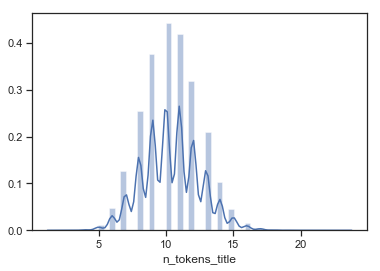

In [84]:
sns.distplot(ab["n_tokens_title"])

In [85]:
ab['n_tokens_title'].describe()

count    39643.000000
mean        10.398784
std          2.114052
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

In [86]:
10.398749+(2.114037*3)

16.74086

In [87]:
ab.loc[ab['n_tokens_title']>16.74086,'n_tokens_title']=0

In [88]:
ab['n_tokens_title'].replace(0,np.NaN,inplace=True)

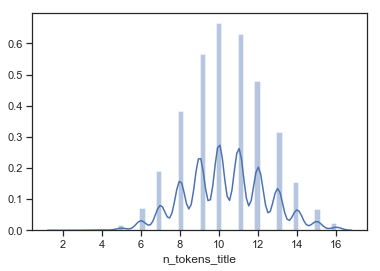

In [89]:
ab['n_tokens_title'] = ab['n_tokens_title'].fillna(method='ffill')
sns.distplot(ab.n_tokens_title)

In [90]:
ab['n_tokens_content'].describe()

count    39643.000000
mean       546.488914
std        471.085404
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [91]:
546.514731+(471.107508*3)

1959.837255

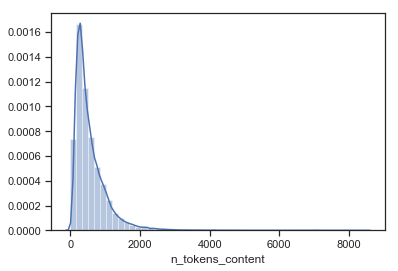

In [92]:
sns.distplot(ab['n_tokens_content'])

In [93]:
ab.loc[df['n_tokens_content']>2000,'n_tokens_content']=0

In [94]:
ab['n_tokens_content'].replace(0,np.NaN,inplace=True)

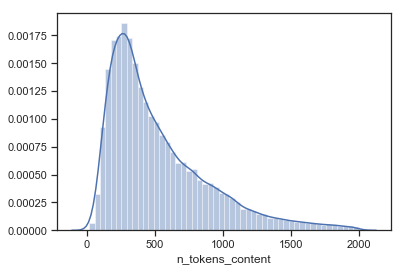

In [95]:
ab['n_tokens_content'] = ab['n_tokens_content'].fillna(method='ffill')
sns.distplot(ab.n_tokens_content)

In [96]:
ab['n_unique_tokens'].describe()

count    39643.000000
mean         0.530547
std          0.137112
min          0.000000
25%          0.470867
50%          0.539216
75%          0.608696
max          1.000000
Name: n_unique_tokens, dtype: float64

In [97]:
0.608696+(1.5*(0.608696-0.470870))

0.815435

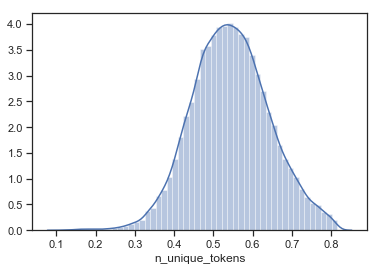

In [98]:
ab.loc[ab['n_unique_tokens']>0.815435,'n_unique_tokens']=0
ab['n_unique_tokens'].replace(0,np.NaN,inplace=True)
ab['n_unique_tokens'] = ab['n_unique_tokens'].fillna(method='ffill')
sns.distplot(ab.n_unique_tokens)

In [99]:
ab['n_non_stop_words'].describe()

count    39643.000000
mean         0.970209
std          0.170012
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: n_non_stop_words, dtype: float64

In [100]:
ab.loc[df['n_non_stop_words']>1,'n_non_stop_words']=1

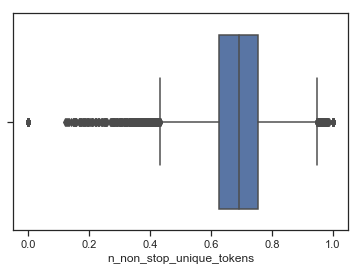

In [101]:
sns.boxplot(ab['n_non_stop_unique_tokens'])

In [102]:
ab['n_non_stop_unique_tokens'].describe()

count    39643.000000
mean         0.672796
std          0.154035
min          0.000000
25%          0.625733
50%          0.690476
75%          0.754624
max          1.000000
Name: n_non_stop_unique_tokens, dtype: float64

In [103]:
0.754630+(1.5*(0.754630-0.625739))

0.9479664999999999

In [104]:
ab.loc[ab['n_non_stop_unique_tokens']>0.947965,'n_non_stop_unique_tokens']=0

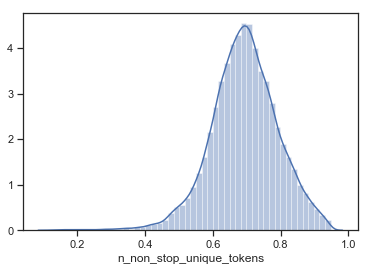

In [105]:
ab['n_non_stop_unique_tokens'].replace(0,np.NaN,inplace=True)
ab['n_non_stop_unique_tokens'] = ab['n_non_stop_unique_tokens'].fillna(method='ffill')
sns.distplot(ab.n_non_stop_unique_tokens)

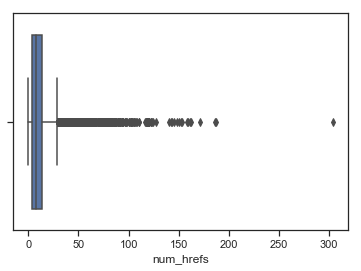

In [106]:
sns.boxplot(ab['num_hrefs'])

In [107]:
ab['num_hrefs'].describe()

count    39643.000000
mean        10.883687
std         11.332160
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

In [108]:
10.883690+(11.332017*3)

44.879741

In [109]:
ab.loc[ab['num_hrefs']>44.879741,'num_hrefs']=0

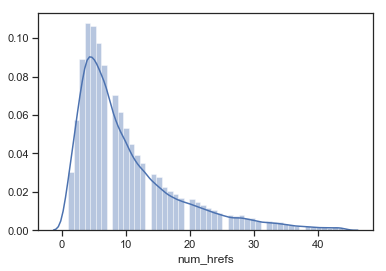

In [110]:
ab['num_hrefs'].replace(0,np.NaN,inplace=True)
ab['num_hrefs'] = ab['num_hrefs'].fillna(method='ffill')
sns.distplot(ab.num_hrefs)

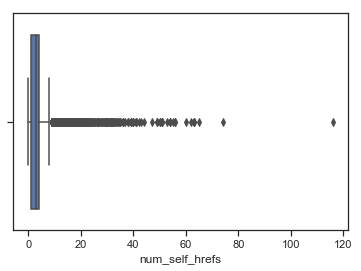

In [111]:
sns.boxplot(ab['num_self_hrefs'])

In [112]:
ab['num_self_hrefs'].describe()

count    39643.000000
mean         3.293469
std          3.855043
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64

In [113]:
3.293638+(3.855141*3)

14.859061

In [114]:
ab.loc[ab['num_self_hrefs']>15,'num_self_hrefs']=0

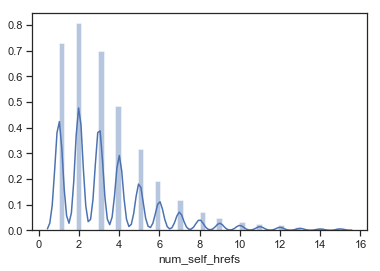

In [115]:
ab['num_self_hrefs'].replace(0,np.NaN,inplace=True)
ab['num_self_hrefs'] = ab['num_self_hrefs'].fillna(method='ffill')
sns.distplot(ab.num_self_hrefs)

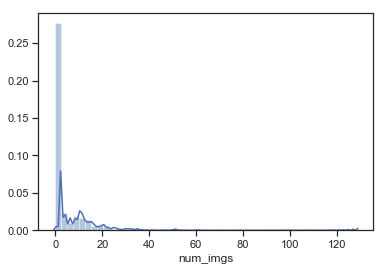

In [116]:
sns.distplot(ab['num_imgs'])

In [117]:
ab['num_imgs'].describe()

count    39643.000000
mean         4.542971
std          8.306262
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

In [118]:
4.544145+(8.309434*3)

29.472447

In [119]:
ab.loc[ab['num_imgs']>30,'num_imgs']=0

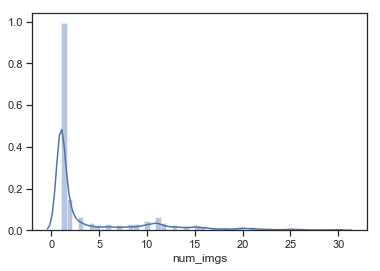

In [120]:
ab['num_imgs'].replace(0,np.NaN,inplace=True)
ab['num_imgs'] = ab['num_imgs'].fillna(method='ffill')
sns.distplot(ab.num_imgs)

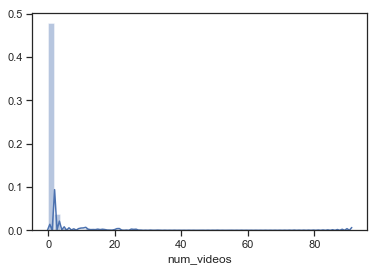

In [121]:
sns.distplot(ab['num_videos'])

In [122]:
ab['num_videos'].describe()

count    39643.000000
mean         1.249905
std          4.107902
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

In [123]:
1.249874+(3*4.107855)

13.573438999999999

In [124]:
ab.loc[ab['num_videos']>15,'num_videos']=14

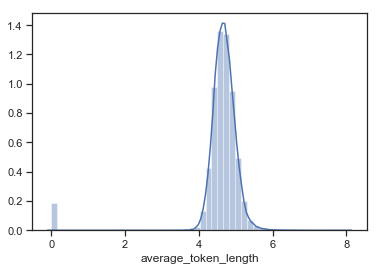

In [125]:
sns.distplot(ab['average_token_length'])

In [126]:
ab['average_token_length'].describe()

count    39643.000000
mean         4.548236
std          0.844416
min          0.000000
25%          4.478403
50%          4.664078
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64

In [127]:
print(4.548239+(3*0.844406))
print(4.548239-(3*0.844406))

7.0814569999999994
2.015021


In [128]:
ab['average_token_length']=ab['average_token_length'].apply(lambda x:np.NaN if (x<2.015021)|(x>7.082) else x)

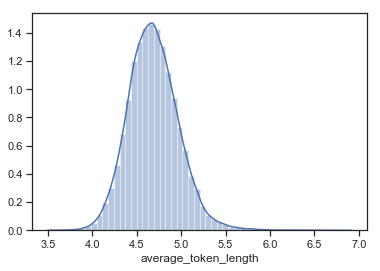

In [129]:
sns.distplot(ab['average_token_length'].dropna())

In [130]:
ab['average_token_length'].fillna(method='ffill',inplace=True)

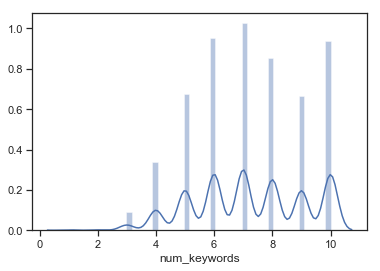

In [131]:
sns.distplot(ab['num_keywords'])

In [132]:
ab['num_keywords'].describe()

count    39643.000000
mean         7.223772
std          1.909154
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64

In [133]:
ab['data_channel_is_lifestyle'].value_counts()

0.0    37544
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

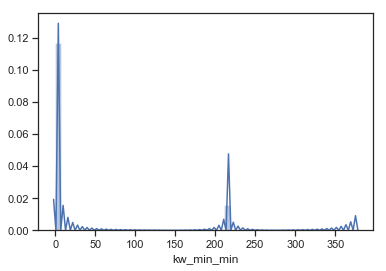

In [134]:
sns.distplot(ab['kw_min_min'])

In [135]:
ab['kw_min_min'].describe()

count    39643.000000
mean        26.107484
std         69.633960
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

In [136]:
ab['kw_min_min']=ab['kw_min_min'].apply(lambda x:np.NaN if (x<0) else x)

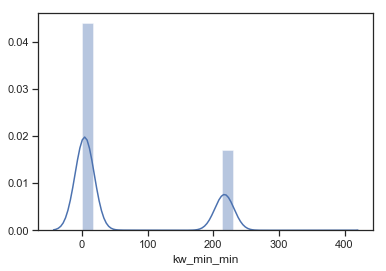

In [137]:
sns.distplot(ab['kw_min_min'].dropna())

In [138]:
ab['kw_min_min'].fillna(0,inplace=True)

In [139]:
ab['kw_min_min'].describe()

count    39643.000000
mean        26.687133
std         69.409694
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

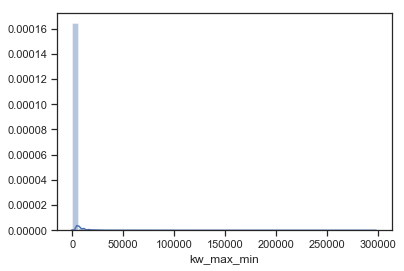

In [140]:
sns.distplot(ab['kw_max_min'])

In [141]:
ab['kw_max_min'].describe()

count     39643.000000
mean       1153.961166
std        3858.039075
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64

In [142]:
1000+(1.5*(1000-445))

1832.5

In [143]:
ab.loc[ab['kw_max_min']>1832.5,'kw_max_min']=0

In [144]:
ab['kw_max_min'].replace(0,np.NaN,inplace=True)

In [145]:
ab['kw_max_min'].fillna(ab['kw_max_min'].median(),inplace=True)
#sns.distplot(df.kw_max_min)

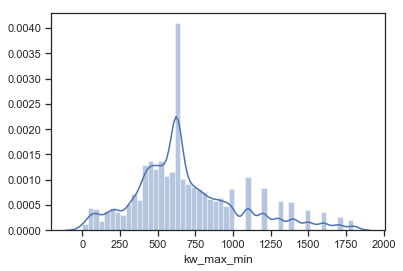

In [146]:
sns.distplot(ab.kw_max_min)

In [147]:
ab["kw_avg_min"].describe()

count    39643.000000
mean       312.371221
std        620.791139
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64

In [148]:
#using IQR
357+(1.5*(357-141.75))

679.875

In [149]:
ab.loc[ab['kw_avg_min']>679.875,'kw_avg_min']=0
ab['kw_avg_min'].replace(0,np.NaN,inplace=True)
ab['kw_avg_min'].fillna(ab['kw_avg_min'].median(),inplace=True)

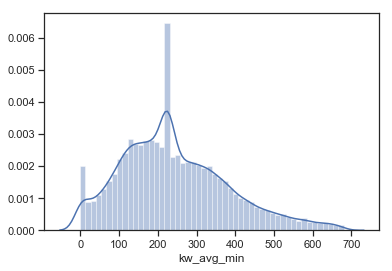

In [150]:
sns.distplot(ab.kw_avg_min)

In [151]:
ab["kw_min_max"].describe()

count     39643.000000
mean      13612.114774
std       57986.741144
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64

In [152]:
7900+(1.5*(7900))

19750.0

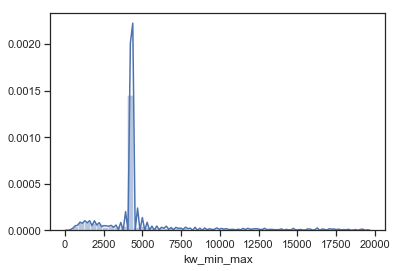

In [153]:
ab.loc[df['kw_min_max']>19750,'kw_min_max']=0
ab['kw_min_max'].replace(0,np.NaN,inplace=True)
ab['kw_min_max'].fillna(ab['kw_min_max'].median(),inplace=True)
sns.distplot(ab.kw_min_max)

In [154]:
ab["kw_max_max"].describe()

count     39643.000000
mean     752321.771813
std      214504.348368
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

In [155]:
ab["kw_avg_max"].describe()

count     39643.000000
mean     259280.143039
std      135103.478543
min           0.000000
25%      172843.750000
50%      244566.666667
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64

In [156]:
330980+(1.5*(330980-172846.875))

568179.6875

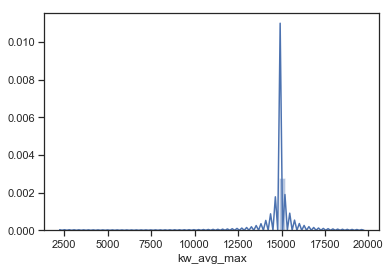

In [157]:
ab.loc[df['kw_avg_max']>19750,'kw_avg_max']=0
ab['kw_avg_max'].replace(0,np.NaN,inplace=True)
ab['kw_avg_max'].fillna(ab['kw_avg_max'].median(),inplace=True)
sns.distplot(ab.kw_avg_max)

In [158]:
ab["kw_max_avg"].describe()

count     39643.000000
mean       5657.265804
std        6098.939173
min           0.000000
25%        3562.101631
50%        4355.694105
75%        6019.957738
max      298400.000000
Name: kw_max_avg, dtype: float64

In [159]:
6019.953968+(1.5*(6019.953968-3562.101631))

9706.7324735

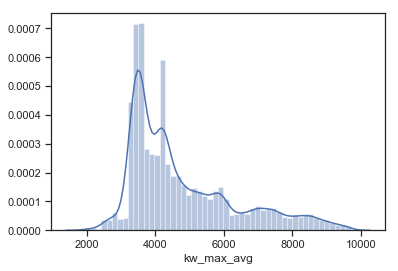

In [160]:
ab.loc[ab['kw_max_avg']>9706.7325,'kw_max_avg']=0
ab['kw_max_avg'].replace(0,np.NaN,inplace=True)
ab['kw_max_avg'].fillna(ab['kw_max_avg'].median(),inplace=True)
sns.distplot(ab.kw_max_avg)

In [161]:
ab["kw_avg_avg"].describe()

count    39643.000000
mean      3135.864283
std       1318.166544
min          0.000000
25%       2382.443334
50%       2870.047184
75%       3600.311954
max      43567.659946
Name: kw_avg_avg, dtype: float64

In [162]:
3135+(3*1318.154)

7089.4619999999995

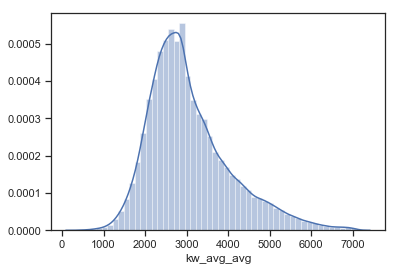

In [163]:
ab.loc[ab['kw_avg_avg']>7090,'kw_avg_avg']=0
ab['kw_avg_avg'].replace(0,np.NaN,inplace=True)
ab['kw_avg_avg'].fillna(ab['kw_avg_avg'].median(),inplace=True)
sns.distplot(ab.kw_avg_avg)

# 6.Label Encoding / Get Dummies:

# 7.  Data handling:	Check conditions for data imputation and data imbalance for the given dataset. Handling data imputation if needed and balance the data (Either go for under sampling or smote). If not, then explain why you do not need sampling.	10

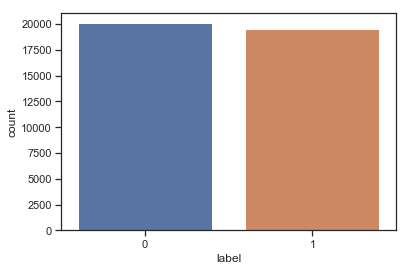

In [164]:
sns.countplot(x='label',data=df)

In [165]:
df["label"].value_counts()

0    20082
1    19561
Name: label, dtype: int64

In [166]:
df.dropna(inplace=True)

In [167]:
X=df.drop(["url","timedelta","label","shares",'data_channel'],axis=1)
Y=df["label"]

# Feature selection and Feature engineering with logistic, decision tree, KNN, Naïve Bayes

# Backward elimination FOR FEATURE SELECTION

In [168]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['n_tokens_content', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']


n_unique_tokens  scatter Plot


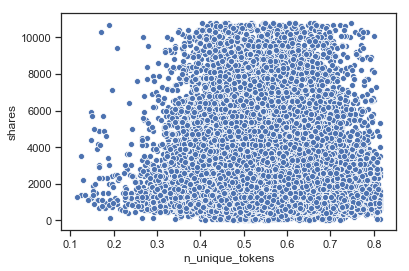

n_non_stop_unique_tokens  scatter Plot


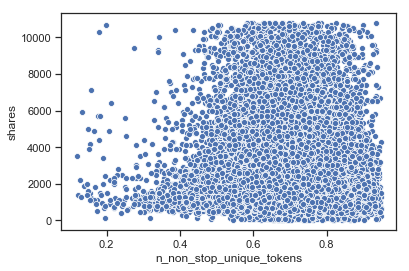

num_hrefs  scatter Plot


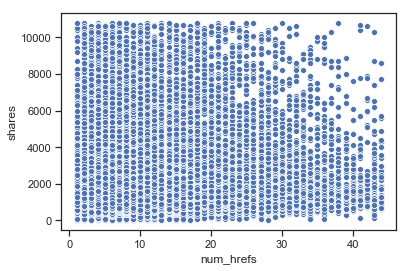

num_videos  scatter Plot


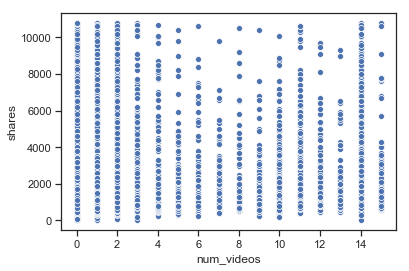

average_token_length  scatter Plot


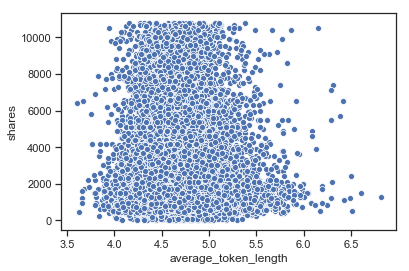

num_keywords  scatter Plot


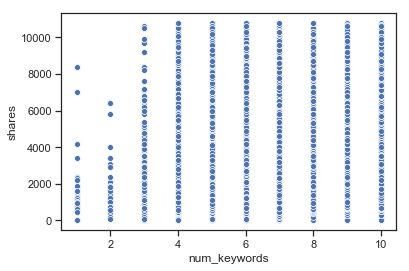

data_channel_is_lifestyle  scatter Plot


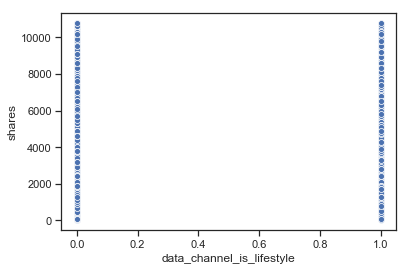

data_channel_is_entertainment  scatter Plot


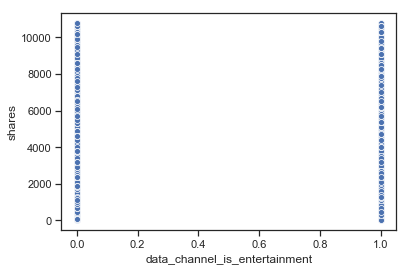

data_channel_is_bus  scatter Plot


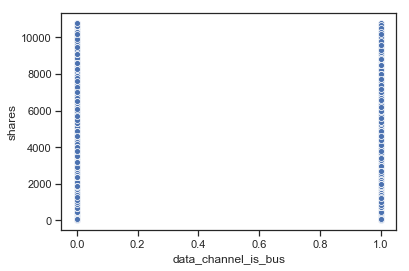

data_channel_is_socmed  scatter Plot


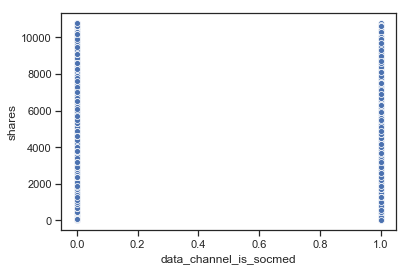

data_channel_is_tech  scatter Plot


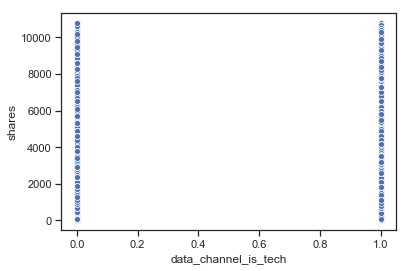

data_channel_is_world  scatter Plot


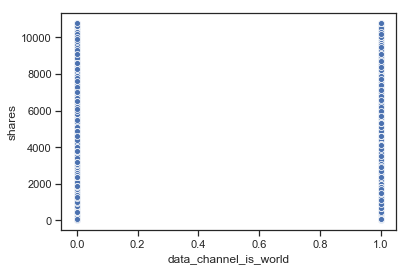

kw_min_min  scatter Plot


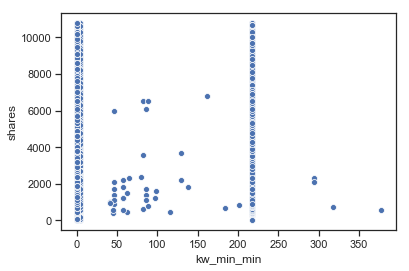

kw_avg_min  scatter Plot


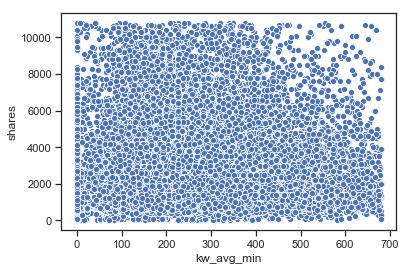

kw_min_max  scatter Plot


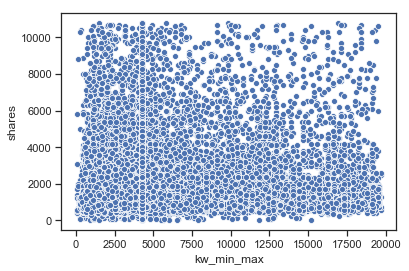

kw_max_avg  scatter Plot


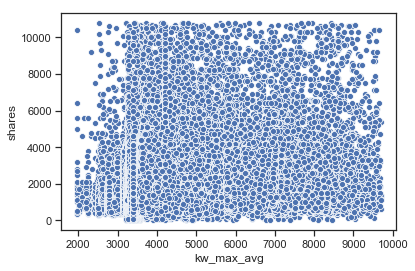

kw_avg_avg  scatter Plot


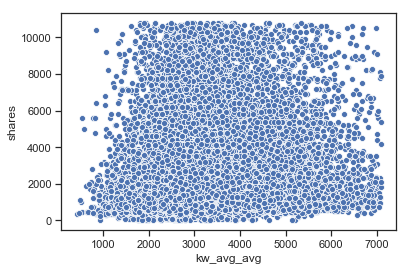

self_reference_min_shares  scatter Plot


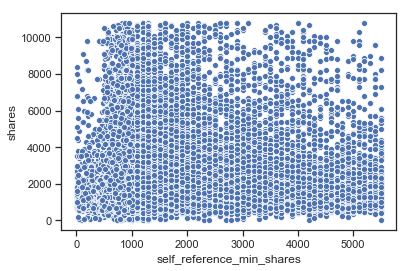

self_reference_max_shares  scatter Plot


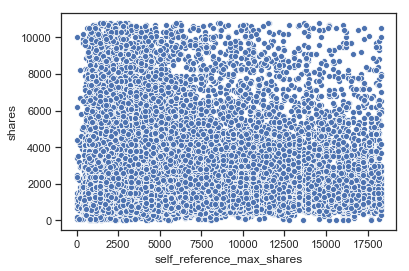

self_reference_avg_sharess  scatter Plot


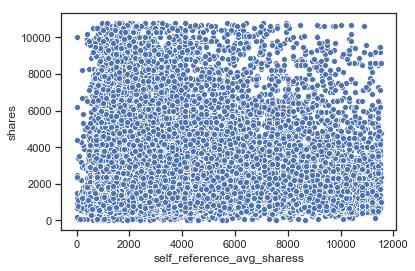

weekday_is_monday  scatter Plot


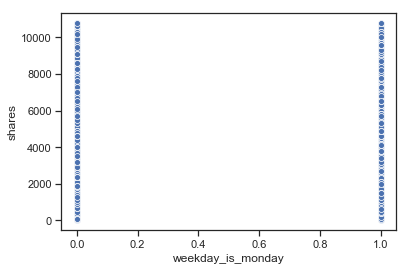

weekday_is_friday  scatter Plot


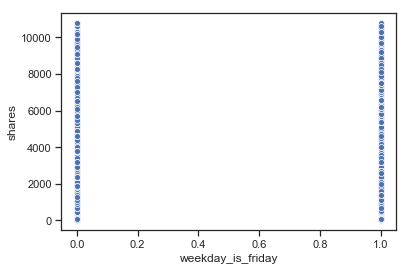

weekday_is_saturday  scatter Plot


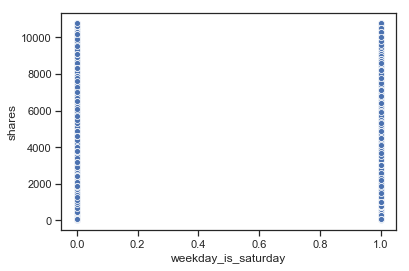

weekday_is_sunday  scatter Plot


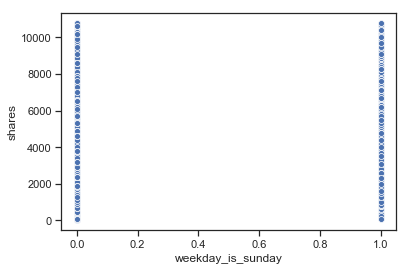

is_weekend  scatter Plot


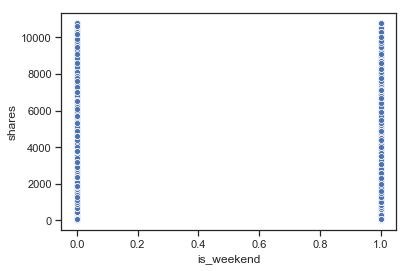

LDA_00  scatter Plot


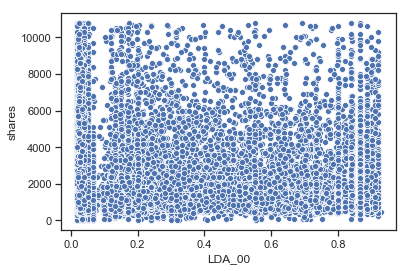

LDA_04  scatter Plot


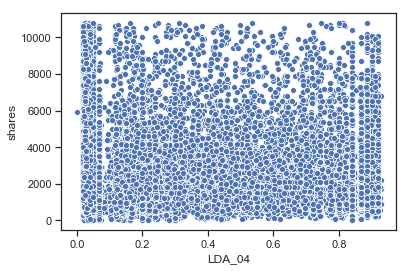

global_subjectivity  scatter Plot


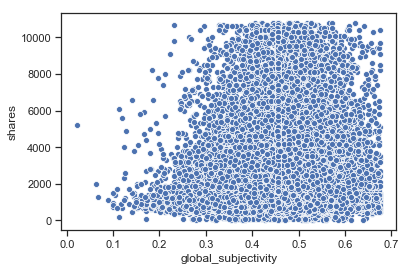

rate_positive_words  scatter Plot


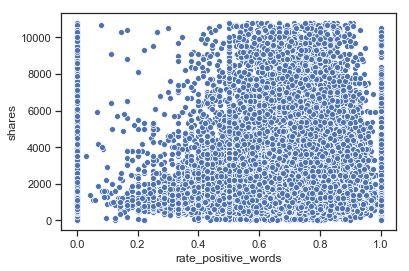

rate_negative_words  scatter Plot


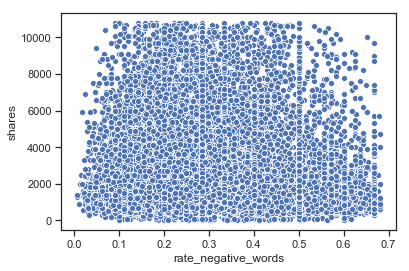

avg_positive_polarity  scatter Plot


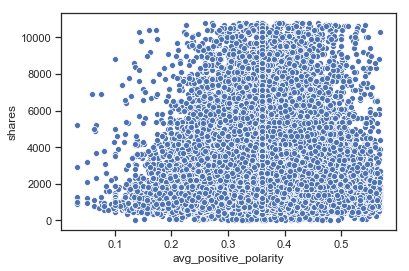

title_subjectivity  scatter Plot


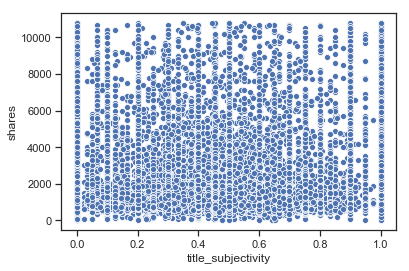

abs_title_subjectivity  scatter Plot


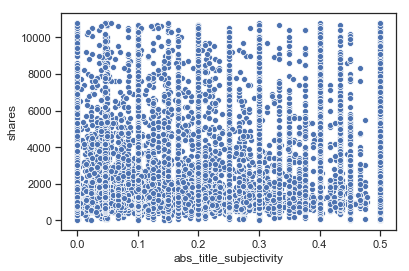

In [171]:
for cols in df[['n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_videos', 'average_token_length',
                 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
                 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 
                 'kw_min_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 
                 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_friday', 'weekday_is_saturday', 
                 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_04', 'global_subjectivity', 'rate_positive_words',
                 'rate_negative_words', 'avg_positive_polarity', 'title_subjectivity', 'abs_title_subjectivity']]:
        sns.scatterplot(df[cols],df["shares"])
        print(cols,' scatter Plot')
        plt.show()

In [169]:
xx=df[['n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 'kw_min_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_04', 'global_subjectivity', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'title_subjectivity', 'abs_title_subjectivity']]

# Feature selection using RFE

Columns obtained from rfe

In [172]:
xrfe=df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_negative_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]

In [178]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [179]:
from sklearn.ensemble import RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import train_test_split, GridSearchCV
import random
np.random.seed(42)

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(xtrain,ytrain)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


In [181]:
fit_rf.set_params(bootstrap=True, criterion='gini', max_depth= 4, max_features='auto')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [183]:
fit_rf.fit(xtrain,ytrain)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [184]:
fit_rf.score(xtest,ytest)

0.6454786227771472

In [193]:
y_pred=fit_rf.predict(xtest)

In [203]:
from sklearn.metrics import confusion_matrix,auc

In [208]:
print(confusion_matrix(ytest,y_pred))

[[2650 1425]
 [1386 2468]]


In [205]:
fpr_dt,tpr_dt,ther=roc_curve(ytest,y_pred)

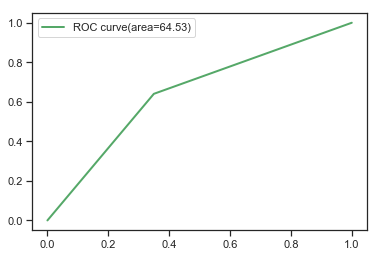

In [207]:
plt.plot(fpr_dt,tpr_dt,color='g',lw=2,label='ROC curve(area=%0.2f)'% round(auc(fpr_dt,tpr_dt)*100,2))
plt.legend()

# Feature selection with vif

In [211]:
def variable_importance(fit):
   
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [212]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [213]:
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [218]:
names_index =xtrain

Columns obtained from vif

In [173]:
xvif=df[['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_03',
       'global_sentiment_polarity', 'min_positive_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_sentiment_polarity']]

# Classification models

> Logistic Regression using vif

>Decision Tree using gini as criteria

>Random Forest

-----------Ensemble models------
>LGBM

>Xgboost

In [175]:
from sklearn.model_selection import train_test_split
xtrainvif,xtestvif,ytrainvif,ytestvif=train_test_split(xvif,Y,test_size=0.2,random_state=1)

# Logistic Regression using vif

In [176]:
from sklearn.linear_model import LogisticRegression
Lr1=LogisticRegression()
Lr1.fit(xtrainvif,ytrainvif)
y_pred_Lr1 = Lr1.predict(xtestvif)

In [177]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
print(classification_report(ytestvif,y_pred_Lr1))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      3962
           1       0.64      0.60      0.62      3967

    accuracy                           0.63      7929
   macro avg       0.63      0.63      0.63      7929
weighted avg       0.63      0.63      0.63      7929



In [178]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(ytestvif,y_pred_Lr1))

0.6193396841967899


In [179]:
roc_auc_score(ytestvif,Lr1.predict_proba(xtestvif)[:,1])

0.6797389035005732

In [188]:
Model.append('Logistic Regression with vif')
ROC_AUC_Accuracy.append(roc_auc_score(ytestvif,Lr1.predict_proba(xtestvif)[:,1]))
Precision.append(round(precision_score(ytestvif,y_pred_Lr1), 4))
Recall.append(round(recall_score(ytestvif, y_pred_Lr1,average='macro'), 40))
F1_score.append(round(f1_score(ytestvif,y_pred_Lr1, average='macro'), 4))

# Confusion matrix for logistic reg using vif

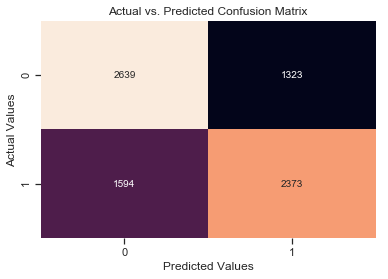

In [191]:
from sklearn.metrics import confusion_matrix,auc
cmlv=confusion_matrix(ytestvif,y_pred_Lr1)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cmlv, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [192]:
print(confusion_matrix(ytestvif,y_pred_Lr1))

[[2639 1323]
 [1594 2373]]


# Roc_auc curve for Logistic Reg using vif

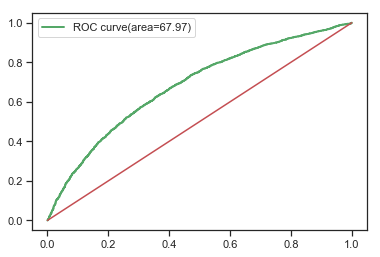

In [193]:
fpr_lv,tpr_lv,therlv=roc_curve(ytestvif,Lr1.predict_proba(xtestvif)[:,1])
plt.plot(fpr_lv,tpr_lv,color='g',lw=2,label='ROC curve(area=%0.2f)'% round(auc(fpr_lv,tpr_lv)*100,2))
plt.plot(fpr_lv,fpr_lv,color='r')
plt.legend()

In [208]:
xtrainm,xtestm,ytrainm,ytestm=train_test_split(x,y,test_size=0.3,random_state=42)

# DECISION TREE

In [209]:
from sklearn.tree import DecisionTreeClassifier
ginidt=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,random_state=100)
ginidt.fit(xtrainm,ytrainm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [210]:
ginipred=ginidt.predict(xtestm)

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(ytestm,ginipred)

0.6259144034305895

In [212]:
roc_auc_score(ytestm,ginidt.predict_proba(xtestm)[:,1])

0.6568132528344608

In [213]:
Model.append('Decision Tree with gini criterion')
ROC_AUC_Accuracy.append(roc_auc_score(ytestm,ginidt.predict_proba(xtestm)[:,1]))
Precision.append(round(precision_score(ytestm,ginipred), 4))
Recall.append(round(recall_score(ytestm,ginipred,average='macro'), 40))
F1_score.append(round(f1_score(ytestm,ginipred, average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Logistic Regression with vif',
  'Decision Tree with gini criterion'],
 [0.6034580646037054, 0.6797389035005732, 0.6568132528344608],
 [0.6212, 0.642, 0.6295],
 [0.6034580646037055, 0.6321313824921325, 0.624909616437595],
 [0.6014, 0.6317, 0.6244])

# Confusion matrix for decision tree

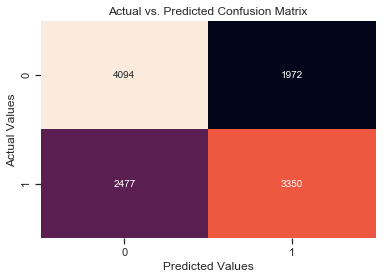

In [214]:
cmd=confusion_matrix(ytestm,ginipred)

sns.heatmap(cmd, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

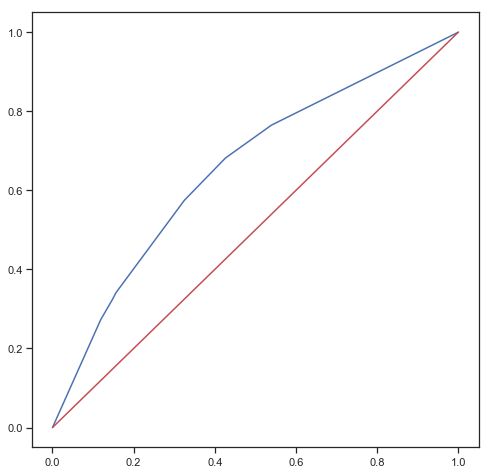

In [218]:
from sklearn.metrics import roc_curve
dtf, dtt, threhdt = roc_curve(ytestm,ginidt.predict_proba(xtestm)[:,1])
plt.figure(figsize=(8,8))
plt.plot(dtf, dtt, label='decision tree')
plt.plot(dtf,dtf,color='r')

# Random Forest

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [222]:
rf = RandomForestClassifier()
 
params = {
    'n_estimators':range(100,1000,100),
    'criterion':['gini','entropy'],
    'max_depth':range(5,25,5),
#     'max_features':['auto','log2','sqrt'],
    'max_features':range(5,39,2),
    'bootstrap':[True,False]
}

rand_rf = RandomizedSearchCV(rf,param_distributions=params,cv=5,n_iter=10,n_jobs=-1,random_state=42)
rand_rf.fit(xtrainm,ytrainm)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [223]:
rf1 = RandomForestClassifier(**rand_rf.best_params_)
rf1.fit(xtrainm,ytrainm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
roc_auc_score(ytestm,rf1.predict_proba(xtestm)[:,1])

0.7304624532012742

In [228]:
rf1.fit(xtrainvif,ytrainvif)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
roc_auc_score(ytestvif,rf1.predict_proba(xtestvif)[:,1])

0.7323325054109324

# Confusion matrix of Random Forest

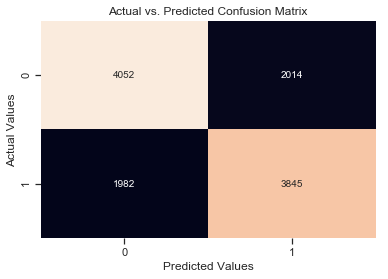

In [225]:
cmrf=confusion_matrix(ytestm,rf1.predict(xtestm))
sns.heatmap(cmrf, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# ROC_auc curve for Random Forest

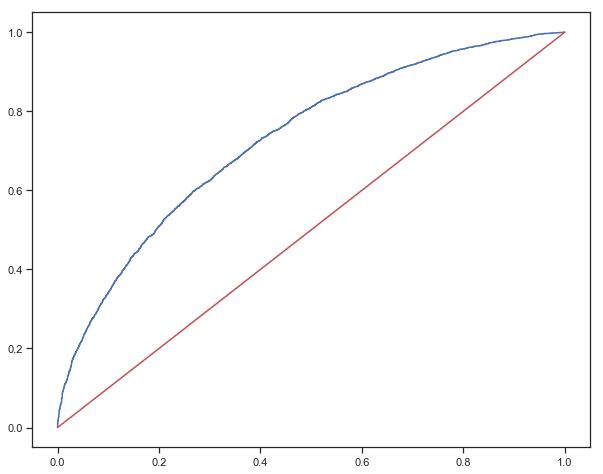

In [226]:
rff, rft, threhrf = roc_curve(ytestm,rf1.predict_proba(xtestm)[:,1])
plt.figure(figsize=(10,8))
plt.plot(rff, rft, label='random forest')
plt.plot(rff,rff,color='r')

In [227]:
Model.append('Random Forest')
ROC_AUC_Accuracy.append(roc_auc_score(ytestm,rf1.predict_proba(xtestm)[:,1]))
Precision.append(round(precision_score(ytestm,rf1.predict(xtestm)), 4))
Recall.append(round(recall_score(ytestm,rf1.predict(xtestm),average='macro'), 40))
F1_score.append(round(f1_score(ytestm,rf1.predict(xtestm), average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Logistic Regression with vif',
  'Decision Tree with gini criterion',
  'Random Forest'],
 [0.6034580646037054,
  0.6797389035005732,
  0.6568132528344608,
  0.7304624532012742],
 [0.6212, 0.642, 0.6295, 0.6563],
 [0.6034580646037055,
  0.6321313824921325,
  0.624909616437595,
  0.6639223843482235],
 [0.6014, 0.6317, 0.6244, 0.6639])

In [230]:
Model.append('Random Forest with vif')
ROC_AUC_Accuracy.append(roc_auc_score(ytestvif,rf1.predict_proba(xtestvif)[:,1]))
Precision.append(round(precision_score(ytestvif,rf1.predict(xtestvif)), 4))
Recall.append(round(recall_score(ytestvif,rf1.predict(xtestvif),average='macro'), 40))
F1_score.append(round(f1_score(ytestvif,rf1.predict(xtestvif), average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Logistic Regression with vif',
  'Decision Tree with gini criterion',
  'Random Forest',
  'Random Forest with vif'],
 [0.6034580646037054,
  0.6797389035005732,
  0.6568132528344608,
  0.7304624532012742,
  0.7323325054109324],
 [0.6212, 0.642, 0.6295, 0.6563, 0.6704],
 [0.6034580646037055,
  0.6321313824921325,
  0.624909616437595,
  0.6639223843482235,
  0.6671766582126879],
 [0.6014, 0.6317, 0.6244, 0.6639, 0.6671])

-----------------------------------------------------------------------

# LGBM

In [231]:
from lightgbm import LGBMModel,LGBMClassifier
lgbm = LGBMClassifier(objective='binary',n_estimators=10,reg_alpha=2,reg_lambda=5,random_state=1,learning_rate=0.01,is_unbalance=True)

In [240]:
lgbm.fit(xtrainm,ytrainm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, learning_rate=0.01,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=10, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=1, reg_alpha=2, reg_lambda=5,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [241]:
ypp=lgbm.predict(xtestm)

In [237]:
roc_auc_score(ytestm,lgbm.predict_proba(xtestm)[:,1])

0.6902000502123334

In [242]:
Model.append('Lgbm')
ROC_AUC_Accuracy.append(roc_auc_score(ytestm,lgbm.predict_proba(xtestm)[:,1]))
Precision.append(round(precision_score(ytestm,ypp), 4))
Recall.append(round(recall_score(ytestm, ypp,average='macro'), 40))
F1_score.append(round(f1_score(ytestm,ypp, average='macro'), 4))
Model,ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Logistic Regression with vif',
  'Decision Tree with gini criterion',
  'Random Forest',
  'Random Forest with vif',
  'Lgbm',
  'Lgbm'],
 [0.6034580646037054,
  0.6797389035005732,
  0.6568132528344608,
  0.7304624532012742,
  0.7323325054109324,
  0.6968221283743926],
 [0.6212, 0.642, 0.6295, 0.6563, 0.6704, 0.666],
 [0.6034580646037055,
  0.6321313824921325,
  0.624909616437595,
  0.6639223843482235,
  0.6671766582126879,
  0.641129628884626],
 [0.6014, 0.6317, 0.6244, 0.6639, 0.6671, 0.6388])

In [248]:
del Model[6]

In [249]:
Model

['Logistic Regression',
 'Logistic Regression with vif',
 'Decision Tree with gini criterion',
 'Random Forest',
 'Random Forest with vif',
 'Lgbm']

----------------------------------------------------------------------------------

# Xgboost

In [243]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

seed=0
params = {
       'n_estimators' : [100, 200, 500],
       'learning_rate' : [0.05, 0.1],
       'min_child_weight': [1, 5, 7],
       'gamma': [1, 1.5, 5],
       'subsample': [0.6, 0.8, 1.0],
       'colsample_bytree': [0.6, 0.8, 1.0],
       'max_depth': [3, 4, 5]
       }

rs1 = RandomizedSearchCV(xgb_cfl, param_distributions=params, scoring='accuracy', n_jobs=-1)
rs1.fit(xtrainm,ytrainm)
rs1.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [244]:
xgcl = xgb.XGBClassifier(**rs1.best_params_)
xgcl.fit(xtrainm, ytrainm)
xg_pred = xgcl.predict(xtestm)

In [245]:
roc_auc_score(ytestm,xgcl.predict_proba(xtestm)[:,1])

0.7316661197962508

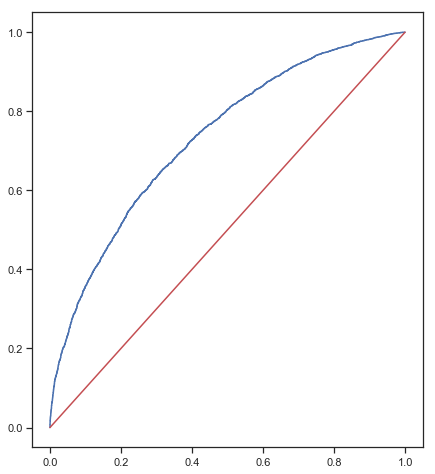

In [252]:
rxg, rtxg, threxg = roc_curve(ytestm,xgcl.predict_proba(xtestm)[:,1])
plt.figure(figsize=(7,8))
plt.plot(rxg,rtxg, label='xgboost')
plt.plot(rxg,rxg,color='r')

In [253]:
Model.append('xgboost')
ROC_AUC_Accuracy.append(roc_auc_score(ytestm,xgcl.predict_proba(xtestm)[:,1]))
Precision.append(round(precision_score(ytestm,xg_pred), 4))
Recall.append(round(recall_score(ytestm,xg_pred,average='macro'), 40))
F1_score.append(round(f1_score(ytestm,xg_pred, average='macro'), 4))
Model, ROC_AUC_Accuracy,Precision,Recall,F1_score

(['Logistic Regression',
  'Logistic Regression with vif',
  'Decision Tree with gini criterion',
  'Random Forest',
  'Random Forest with vif',
  'Lgbm',
  'xgboost'],
 [0.6034580646037054,
  0.6797389035005732,
  0.6568132528344608,
  0.7304624532012742,
  0.7323325054109324,
  0.6968221283743926,
  0.7316661197962508],
 [0.6212, 0.642, 0.6295, 0.6563, 0.6704, 0.666, 0.6602],
 [0.6034580646037055,
  0.6321313824921325,
  0.624909616437595,
  0.6639223843482235,
  0.6671766582126879,
  0.641129628884626,
  0.6668073167583786],
 [0.6014, 0.6317, 0.6244, 0.6639, 0.6671, 0.6388, 0.6668])

# Conclusion

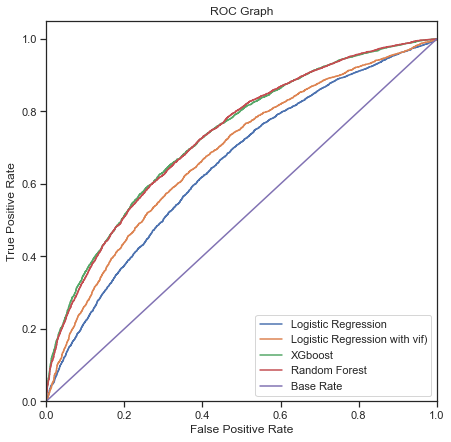

In [256]:
plt.figure(figsize=(7,7))
from sklearn.metrics import roc_curve
plt.plot(fpr_l,tpr_l, label='Logistic Regression')
plt.plot(fpr_lv, tpr_lv, label='Logistic Regression with vif)')
plt.plot(rxg,rtxg, label='XGboost')
plt.plot(rff, rft, label='Random Forest')
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Important features for our model

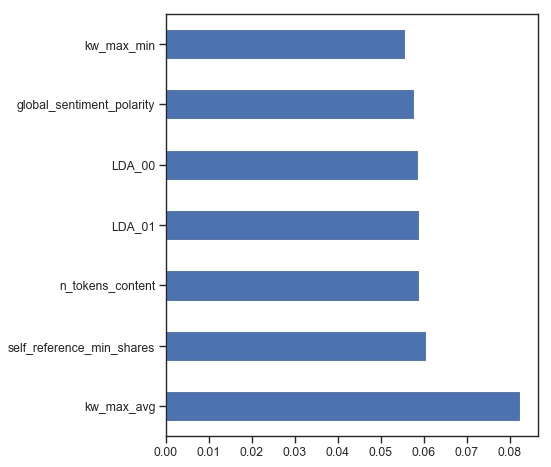

In [262]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6,7), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf1.feature_importances_, index= xvif.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [257]:
final_result = pd.DataFrame({'Model':Model,'ROC_AUC_Accuracy':ROC_AUC_Accuracy,'Precision':Precision,'Recall':Recall,'F1_score':F1_score})
final_result

,Model,ROC_AUC_Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.603458,0.6212,0.603458,0.6014
1,Logistic Regression with vif,0.679739,0.6420,0.632131,0.6317
2,Decision Tree with gini criterion,0.656813,0.6295,0.624910,0.6244
3,Random Forest,0.730462,0.6563,0.663922,0.6639
4,Random Forest with vif,0.732333,0.6704,0.667177,0.6671
5,Lgbm,0.696822,0.6660,0.641130,0.6388
6,xgboost,0.731666,0.6602,0.666807,0.6668


So we can see from the above classification models Random Forest with vif gives the best roc_auc score because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. Vif removes the unimportant features and upon the cleared columns and dataset random forest further ranks the most important feature accordingly.
Random outliers doesn't affect random forest as it bins the values.If we want to use the outlier treated dataset we used 3sigma and zscore method for outlier treatment.
The next best model is xgboost which gives the next best result.
As the best model was Random forest so we got the most important features according to Random forest model
which are :kw_max_min,global_sentiment_polarity,LDA_00,LDA_01,n_tokens_content,self_reference_min_shares,kw_max_avg


>As the data was balanced so we didn’t use any sampling technique. Outliers were retained since removing them didn’t impact model scores significantly. 

>For our model we are considering recall rather than precision as we want to focus on articles where the number of shares were more. Thus, focusing on the articles which predicted as popular and were actually popular. So accordingly, we will focus on those articles to see what are the factors which will increase the popularity of the articles.

Limitations
>As one of the features of the dataset is URL on which text mining can be performed which would improve the accuracy. But as we don’t have knowledge of text mining, we couldn’t use that.

>According to our dataset we needed more features relevant to shares prediction which would contribute to accuracy of the classification models.

>The dependent and the independent features had no linear relationship so it was hard to come to proper inferences.
LDA_00, LDA_01, LDA_02, LDA_03, LDA_04 are topical modelling features from NLP that are undefined. Since we do not know the topics, we could not infer from them.


# Recommendation and actionable insights

>The no of keywords in the article should be a range between 6 to 10. Keyboards lesser than 6 leads to less discovery and hence less shares, while keywords more than 10 implies more words in the articles or an article of varied topics. These negatively affect the number of shares. 

>The timing of publishing in relation to the content affects its popularity. 

>The number of words in the article should be less than 1500 words. The lesser the better.

>Article title shouldn’t be too long or too short. 6 – 14 words is the ideal number of words to have for titles.

>Articles should have good amount of images. Between 1 – 20 images is great. Also having a couple of videos is also nice for article popularity, but not too much. The higher the lower the odds.

>The number of keywords in the metadata really influences the shares to a margin. The higher the value the better the shares chances. A value upward of 5 is recommend.

>The number of words in the tile should be in the range 8 to 13. More or less negatively impacts the number of shares.

>Articles referencing popular articles have a higher chance of improving their own popularity.

>Increase the number of popular unique words in the article to increase the chances of having better popularity.

>The amount of multi-topic discussion in an article must be reduced. It would be recommended that different domains be created to cater to different topics.

>Best popular articles are usually posted on Saturdays and Sunday (and a bit of Tuesdays). 

>Articles that talks about current trending tends to have higher popularity. Ideally, articles about a company/product published before their earnings call generate more shares.

>Increase the amount of subjectivity in the title and content.

>The "Social Media" and "Others" channel are great for the best popularity. Though the number of articles are more in "World" channel, it does not contribute to more popularity.
